In [12]:
from utils import load_model
import matplotlib.pyplot as plt

In [5]:
import torch
from torchvision import datasets, transforms

In [9]:
from models import SimpleVAE

VAE = SimpleVAE

In [10]:
vae = load_model("simple_vae_model.mdl")

### Inference

<Figure size 640x480 with 0 Axes>

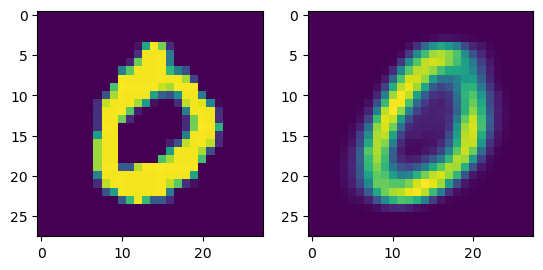

In [18]:
test_dataset = datasets.MNIST(root='./mnist_data/', train=False, transform=transforms.ToTensor(), download=False)
inference_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=1, shuffle=False)

def display_vae_imgs(x):
    y = vae(x)
    x = x.reshape([28,28,1])
    y = y[0].reshape((28, 28, 1)).detach()
    plt.figure()
    f, axarr = plt.subplots(1,2) 
    axarr[0].imshow(x)
    axarr[1].imshow(y)


for i, (x, y) in enumerate(inference_loader):

    if i>=3:
        display_vae_imgs(x)
        break


### Generative

<Figure size 640x480 with 0 Axes>

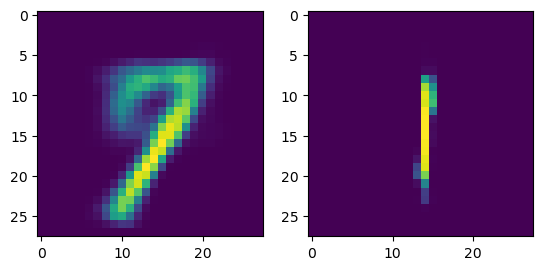

In [17]:
plt.figure()
f, axarr = plt.subplots(1,2) 

mu = torch.tensor([[1.4958, 1.4180]])
log_var = torch.tensor([[-6.3008, -6.1549]])

x_sample = vae.sampling(mu=mu, log_var=log_var)
y = vae.decoder(x_sample).detach().reshape((28, 28, 1))

axarr[0].imshow(y)

mu = torch.tensor([[1.4, 1.6]])
log_var = torch.tensor([[2.3008, 2.5]])

x_sample = vae.sampling(mu=mu, log_var=log_var)

y = vae.decoder(x_sample).detach().reshape((28, 28, 1))

axarr[1].imshow(y)